In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('housing.csv')

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\fujir\anaconda3\envs\py-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

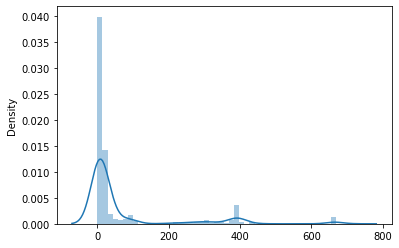

In [7]:
sns.distplot(df)

In [8]:
col='x6'

In [9]:
df.mean()

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [14]:
mean=df.mean()
mean[col]

6.284634387351779

In [17]:
sigma=df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [18]:
sigma[col]

0.7026171434153233

In [21]:
low=mean[col]-3*sigma[col]
low

4.176782957105809

In [22]:
high=mean[col]+3*sigma[col]
high

8.392485817597748

In [28]:
df2=df[(df[col]>low) & (df[col]<high)]

In [29]:
len(df)

506

In [30]:
len(df2)

498

C:\Users\fujir\anaconda3\envs\py-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

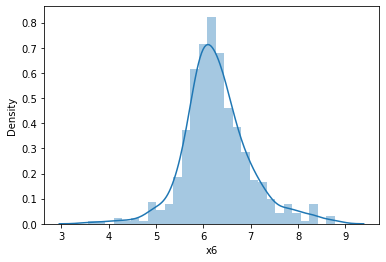

In [31]:
sns.distplot(df['x6'])

C:\Users\fujir\anaconda3\envs\py-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

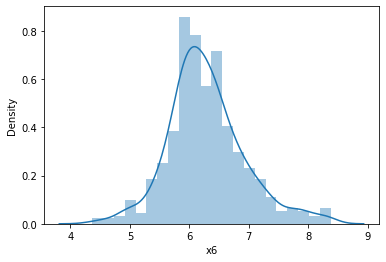

In [32]:
sns.distplot(df2['x6'])

In [55]:
_df=df

for col in cols:
    low=mean[col]-3*sigma[col]
    high=mean[col]+3*sigma[col]
    _df=_df[(_df[col]>low) & (_df[col]<high)]

In [54]:
cols=df.columns

In [56]:
len(df)

506

In [57]:
len(_df)

415

In [58]:
X=_df.iloc[:,:-1]
y=_df.iloc[:,-1]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model=LinearRegression()

In [63]:
model.fit(X_train,y_train)

LinearRegression()

In [64]:
model.score(X_train,y_train)

0.7972109224535133

In [66]:
model.score(X_test,y_test)

0.6253776004329576

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

In [70]:
scaler.fit(X_train)

StandardScaler()

In [72]:
X_train2=scaler.transform(X_train)
X_test2=scaler.transform(X_test)

In [73]:
model=LinearRegression()

In [74]:
model.fit(X_train2,y_train)

LinearRegression()

In [75]:
model.score(X_train2,y_train)

0.7972109224535134

In [76]:
model.score(X_test2,y_test)

0.6253776004329595

In [80]:
np.set_printoptions(precision=2,suppress=True)

In [81]:
model.coef_

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])